**INTEGRANTES**

Nome completo: Alexsandro dos Santos Silva - RA: 319200068

Nome completo: Evelyn Castro Maia e Souza - RA: 3019200390

Nome completo: Filipe Queiroz de Abreu - RA: 919210778

Nome completo: Kaike Soares Silva - RA: 919209611

Nome completo: Nailda Rodrigues Gonçalves - RA: 919203559


## **ATIVIDADE 1**

In [ ]:
#IMPORTANDO A BIBLIOTECA
import pandas as pd

In [ ]:
#LENDO OS ARQUIVOS
df1 = pd.read_csv('reclamacoes-fundamentadas-sindec-2012.csv', nrows=1000)
df2 = pd.read_csv('reclamacoes-fundamentadas-sindec-2013.csv', nrows=1000)
df3 = pd.read_csv('reclamacoes-fundamentadas-sindec-2014.csv', nrows=1000)
df4 = pd.read_csv('reclamacoes-fundamentadas-sindec-2015.csv', nrows=1000)
df5 = pd.read_csv('reclamacoes-fundamentadas-sindec-2016.csv', nrows=1000)

In [ ]:
#NOME DOS CONJUNTOS DE DADOS
frame = [df1, df2, df3, df4, df5]

In [ ]:
#CONCATENA OS DATASETS
df_full = pd.concat(frame)

In [ ]:
#ESCREVE O CONJUNTO DE DADOS EM CSV NO CAMINHO INDICADO
df_full.to_csv('/content/drive/MyDrive/AulaIA/df_full.csv')

## **ATIVIDADE 2**

In [ ]:
# CARREGAR O DATASET
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 

auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# BAIXANDO OS DADOS
link = 'https://drive.google.com/file/d/1-1kECBDvjH_OzubBLwdiE8_NWLetTtjT/view'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('df_full.csv')
df = pd.read_csv('df_full.csv')
df.sample(3)

,Unnamed: 0,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
3084,84,2015,2015-03-26 13:41:34.000,2015-02-24 14:39:58.000,5,Centro-oeste,MT,JOSE DE ERIMATEIA COSTA LOPES ME,SOUZ ACESSORIOS,1,...,4530703.0,COMÉRCIO A VAREJO DE PEÇAS E ACESSÓRIOS NOVOS ...,S,89,"Acessório Para Veículo ( Alarme, Amortecedor, ...",102,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos,78600000.0
2426,426,2014,2014-07-03 15:43:54.000,2013-05-06 15:06:29.000,1,Norte,AC,BANCO DO BRASIL S.A.,BANCO DO BRASIL SUPERINTENDENCIA,1,...,NaN,NaN,N,63,Financeira,28,Cobrança indevida.,M,entre 31 a 40 anos,69909710.0
2452,452,2014,2014-10-20 15:05:47.000,2013-06-03 09:46:45.000,1,Norte,AC,DEPARTAMENTO ESTADUAL DE PAVIMENTAÇÃO E SANEAM...,DEPASA,1,...,3600601.0,"CAPTAÇÃO, TRATAMENTO E DISTRIBUIÇÃO DE ÁGUA",S,183,Água / Esgoto,134,Cobrança indevida/abusiva,M,entre 21 a 30 anos,69915880.0


In [ ]:
#INFORMAÇÕES DE ESTATÍSTICA DESCRITIVAS, COMO: MÉDIA, DESVIO PADRÃO, MÁXIMO, MÍNIMO E OUTRAS TENDÊNCIAS CENTRAIS
df.describe().astype(int)

,Unnamed: 0,AnoCalendario,CodigoRegiao,Tipo,NumeroCNPJ,RadicalCNPJ,CNAEPrincipal,CodigoAssunto,CodigoProblema
count,5000,5000,5000,5000,4385,4358,4269,5000,5000
mean,499,2014,2,0,19894845443565,58715463,5424767,131,114
std,288,1,1,0,23236121804144,1524038626,1620375,67,54
min,0,2012,1,0,191,0,159802,2,3
25%,249,2013,2,1,2449992000164,2449992,4652400,93,102
50%,499,2014,2,1,7772298000105,7984491,6110801,102,105
75%,749,2015,3,1,33041260005476,33041260,6422100,186,134
max,999,2016,5,1,97422620006434,87815257534,9609299,288,262


In [ ]:
#FAIXAS ETARIAS DOS CONSUMIDORES
serviceGroups = df['FaixaEtariaConsumidor']
serviceGroups.value_counts().sort_index()

Nao Informada          354
Nao se aplica            1
até 20 anos             84
entre 21 a 30 anos     871
entre 31 a 40 anos    1188
entre 41 a 50 anos    1028
entre 51 a 60 anos     760
entre 61 a 70 anos     495
mais de 70 anos        219
Name: FaixaEtariaConsumidor, dtype: int64

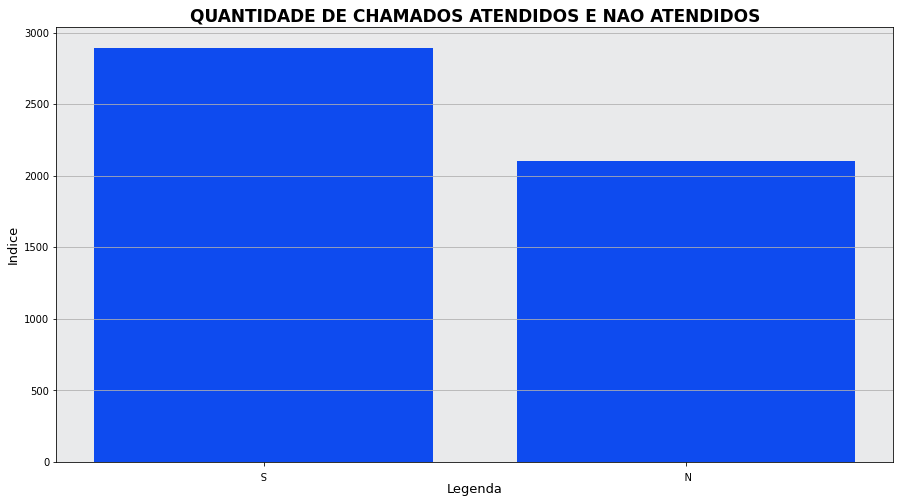

In [ ]:
manufacturerNameCol = df['Atendida']
groupsSum = manufacturerNameCol.value_counts()
x = groupsSum.index
y = groupsSum
 
plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.set_facecolor('#e9eaeb')
plt.xticks(rotation=180)
plt.xlabel('Legenda', fontsize=13)
plt.ylabel('Indice', fontsize=13)
plt.title('QUANTIDADE DE CHAMADOS ATENDIDOS E NAO ATENDIDOS', fontweight='bold', fontsize=17)
plt.bar(x, y, color='#0e4bef')
plt.grid(axis='y')
 
plt.show()

In [ ]:
#FILTRO DOS CHAMADOS
df[['AnoCalendario', 'Regiao', 'UF', 'DescricaoAssunto', 'DescricaoProblema']].groupby([
    'AnoCalendario', 'Regiao', 'UF', 'DescricaoAssunto', 'DescricaoProblema']).count()

Empty DataFrame
Columns: []
Index: [(2012, Centro-oeste, DF, Acessório Para Veículo ( Alarme, Amortecedor, Câmbio, Buzina, Estofamento, Lâmpada, Bateria, etc.), Garantia (Abrangência, cobertura, etc.)), (2012, Centro-oeste, DF, Agências e Operadoras de viagens (pacotes turísticos), Cobrança de embalagem (sacolas)), (2012, Centro-oeste, DF, Agências e Operadoras de viagens (pacotes turísticos), Cobrança indevida/abusiva), (2012, Centro-oeste, DF, Agências e Operadoras de viagens (pacotes turísticos), Contrato - Rescisão/alteração unilateral), (2012, Centro-oeste, DF, Agências e Operadoras de viagens (pacotes turísticos), Extravio/avaria de bagagem, carga, correspondência, mercadoria, mudança, etc.), (2012, Centro-oeste, DF, Agências e Operadoras de viagens (pacotes turísticos), SAC - Cancelamento de serviço (retenção, demora, não envio do comprovante)), (2012, Centro-oeste, DF, Agências e Operadoras de viagens (pacotes turísticos), Serviço não concluído /Fornecimento parcial), (2012, Centro-oeste, DF, Agências e Operadoras de viagens (pacotes turísticos), TOI - Termo de Ocorrência de Irregularidade), (2012, Centro-oeste, DF, Aparelho de Som ( Gravador, 3x1, CD ), Garantia (Abrangência, cobertura, etc.)), (2012, Centro-oeste, DF, Aquecedor / Ventilador / Ar Condicionado / Circulador de Ar, Garantia (Abrangência, cobertura, etc.)), (2012, Centro-oeste, DF, Aquecedor / Ventilador / Ar Condicionado / Circulador de Ar, Não entrega/demora na entrega do produto), (2012, Centro-oeste, DF, Artigo Esportivo / Lazer ( Bola, Raquete, Rede, Cotoveleira, Arma, Baralho, Roleta, Etc. ), Manual de Instrução (em língua estrangeira/falta de informação/informação incorreta)), (2012, Centro-oeste, DF, Artigo de Leitura ( Formal, Jornal, Revista, Folheto, Livros, Etc. ), Contrato/pedido/orçamento (rescisão, descumprimento, erro, etc.)), (2012, Centro-oeste, DF, Banco comercial, Antecipação de Financiamento), (2012, Centro-oeste, DF, Banco comercial, Calculo de prestação em atraso), (2012, Centro-oeste, DF, Banco comercial, Cobrança indevida.), (2012, Centro-oeste, DF, Banco comercial, Cobrança vexatória/difamatória), (2012, Centro-oeste, DF, Banco comercial, Fila em Banco), (2012, Centro-oeste, DF, Banco comercial, Não entrega de copia do contrato), (2012, Centro-oeste, DF, Carro Nacional Zero ( Montadora ), Garantia (Abrangência, cobertura, etc.)), (2012, Centro-oeste, DF, Carro Usado, Demora na montagem/montagem incompleta/incorreta), (2012, Centro-oeste, DF, Cartão de Crédito, Cobrança indevida.), (2012, Centro-oeste, DF, Cartão de Crédito, Consumidor negativado indevidamente nos serviços de proteção ao credito), (2012, Centro-oeste, DF, Cartão de Crédito, Roubo de cartão), (2012, Centro-oeste, DF, Cartão de Crédito, SAC - Resolução de demandas (ausência de resposta, excesso de prazo, não suspensão imediata da cobrança)), (2012, Centro-oeste, DF, Cartão de Loja, Cobrança indevida.), (2012, Centro-oeste, DF, Cartão de Loja, Lançamento Não Reconhecido na Fatura), (2012, Centro-oeste, DF, Colchão, Desistência de compra (cancelamento de compra)), (2012, Centro-oeste, DF, Cursos Livres Outros, Contrato - Rescisão/alteração unilateral), (2012, Centro-oeste, DF, Cursos Livres Outros, SAC - Acesso ao serviço (onerosidade, problemas no menu, indisponibilidade, inacessibilidade aos deficientes)), (2012, Centro-oeste, DF, Cursos Livres Outros, Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato)), (2012, Centro-oeste, DF, Escola ( Pré, 1º, 2º Graus e Superior ), Cobrança indevida/abusiva), (2012, Centro-oeste, DF, Escola ( Pré, 1º, 2º Graus e Superior ), Contrato - Rescisão/alteração unilateral), (2012, Centro-oeste, DF, Estabelecimento comercial (supermercado, loja, padaria, locadora, frutaria, etc.), Serviço não concluído /Fornecimento parcial), (2012, Centro-oeste, DF, Financeira, Cobrança indevida.), (2012, Centro-oeste, DF, Geladeira e Freezer, Garantia (Abrangência, cobertura, etc.)), (2012, Centro-oeste, DF, Geladeira e Freez

## MINERACAO DE TEXTO - ARRUMANDO!

In [ ]:
# elimina pontuação, caracteres especiais, digitos de um texto 
texto_limpo2 = re.sub('(\\d|\\W)+', ' ', texto)
print(texto_limpo2)


texto = texto.lower() # Transforma o texto inteiro em minusculo
texto 

# Retorna os tokens mais comuns 
cont_token = Counter(word_tokenize(texto))
print(cont_token.most_common(10))

print(vectorizer.vocabulary_) # Apresenta o volcabulário com a contagem 

https://colab.research.google.com/drive/11-Ff4hB0IP0Cvb07zY_hvHCje5qY1VM6?usp=sharing#scrollTo=7zmRzssvr1-6

SyntaxError: ignored